In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [69]:
# import dataset
df_cleaned = pd.read_csv('C:/Users/user/Documents/dataset_utp_datmin_2024 (1)/cleaned_dataset.csv')
df_uncleaned_code = pd.read_csv('C:/Users/user/Documents/dataset_utp_datmin_2024 (1)/unclean_code_postaux_belge.csv', sep = ';')
df_uncleaned_house = pd.read_csv('C:/Users/user/Documents/dataset_utp_datmin_2024 (1)/unclean_house_apartment.csv')

# cleaned dataset info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20592 entries, 0 to 20591
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   postal_code             20592 non-null  int64  
 1   city_name               20592 non-null  object 
 2   type_of_property        20592 non-null  object 
 3   subtype_of_property     20592 non-null  object 
 4   price                   20592 non-null  int64  
 5   number_of_rooms         20592 non-null  float64
 6   house_area              20592 non-null  float64
 7   fully_equipped_kitchen  20592 non-null  int64  
 8   open_fire               20592 non-null  int64  
 9   terrace                 20592 non-null  int64  
 10  garden                  20592 non-null  int64  
 11  surface_of_the_land     20592 non-null  float64
 12  number_of_facades       20592 non-null  float64
 13  swimming_pool           20592 non-null  int64  
 14  state_of_the_building   20592 non-null

In [33]:
df_uncleaned_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44693 entries, 0 to 44692
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locality                     44693 non-null  int64  
 1   type_of_property             44693 non-null  object 
 2   subtype_of_property          44693 non-null  object 
 3   price                        44693 non-null  object 
 4   type_of_sale                 44693 non-null  object 
 5   number_of_rooms              44693 non-null  float64
 6   house_area                   37144 non-null  float64
 7   fully_equipped_kitchen       44693 non-null  int64  
 8   furnished                    0 non-null      float64
 9   open_fire                    44693 non-null  int64  
 10  terrace                      44693 non-null  int64  
 11  terrace_area                 14962 non-null  float64
 12  garden                       44693 non-null  int64  
 13  garden_area     

In [18]:
df_uncleaned_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   column_1     2757 non-null   int64  
 1   column_2     2757 non-null   object 
 2   column_3     2757 non-null   float64
 3   column_4     2757 non-null   float64
 4   coordonnees  2757 non-null   object 
 5   geom         0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 129.4+ KB


### Data Cleaning (No 1a)

In [26]:
df_cleaned.head()

,postal_code,city_name,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,lattitude,longitude
0,1050,Ixelles,house,house,340000,6.0,203.0,1,0,1,0,95.0,2.0,0,to be done up,4.381571,50.822285
1,1050,Ixelles,house,house,599000,4.0,160.0,1,0,1,1,100.0,2.0,0,to be done up,4.381571,50.822285
2,1050,Ixelles,house,house,599000,3.0,160.0,1,0,1,1,130.0,2.0,0,good,4.381571,50.822285
3,1050,Ixelles,house,house,575000,3.0,171.0,0,0,0,0,46.0,2.0,0,just renovated,4.381571,50.822285
4,1050,Ixelles,house,house,590000,4.0,225.0,0,0,1,0,0.0,2.0,0,to renovate,4.381571,50.822285


In [34]:
df_uncleaned_house.head()

,locality,type_of_property,subtype_of_property,price,type_of_sale,number_of_rooms,house_area,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_area,garden,garden_area,surface_of_the_land,surface_of_the_plot_of_land,number_of_facades,swimming_pool,state_of_the_building,construction_year
0,1050,house,house,340000,for sale,6.0,203.0,1,NaN,0,1,NaN,0,NaN,95.0,NaN,2.0,0,to be done up,1901.0
1,1880,house,villa,525000,for sale,6.0,250.0,1,NaN,0,1,40.0,1,430.0,826.0,NaN,4.0,0,as new,1992.0
2,7912,house,villa,550000,for sale,4.0,325.0,1,NaN,0,1,125.0,1,2333.0,3570.0,NaN,4.0,0,good,1918.0
3,6032,house,house,550000,for sale,5.0,400.0,1,NaN,0,1,80.0,1,500.0,616.0,NaN,3.0,0,as new,1977.0
4,1650,house,villa,525000,for sale,4.0,220.0,1,NaN,1,1,NaN,1,NaN,1600.0,NaN,4.0,0,good,1990.0


In [27]:
df_uncleaned_code.head()

,column_1,column_2,column_3,column_4,coordonnees,geom
0,1060,Saint-Gilles,4.345668,50.826741,"50.8267409, 4.345668",NaN
1,1080,Molenbeek-Saint-Jean,4.322778,50.854355,"50.8543551, 4.3227779",NaN
2,1083,Ganshoren,4.317510,50.871240,"50.8712396, 4.3175103",NaN
3,1120,Neder-Over-Heembeek,4.390489,50.897796,"50.89779605, 4.39048886842",NaN
4,1300,Wavre,4.607744,50.716419,"50.7164189, 4.607744",NaN


In [71]:
# drop null columns
df_uncleaned_house.drop(columns = ['furnished', 'surface_of_the_plot_of_land'], inplace = True)
df_uncleaned_code.drop(columns = ['geom'], inplace = True)

# rename necessary columns
df_uncleaned_code.rename(columns = {'column_1':'postal_code', 'column_2':'city_name', 'column_3':'lattitude', 'column_4':'longitude'}, inplace = True)
df_uncleaned_house.rename(columns = {'locality':'postal_code'}, inplace = True)

# get necessary columns
df_uncleaned_house = df_uncleaned_house[['postal_code', 'type_of_property', 'subtype_of_property',
                                         'price', 'number_of_rooms', 'house_area', 'fully_equipped_kitchen',
                                         'open_fire', 'terrace', 'garden', 'surface_of_the_land',
                                         'number_of_facades', 'swimming_pool', 'state_of_the_building']]
df_uncleaned_code = df_uncleaned_code[['postal_code', 'city_name', 'lattitude', 'longitude']]

# drop null values
df_uncleaned_house.dropna(inplace = True)
df_uncleaned_code.dropna(inplace = True)

# check dataset info
df_uncleaned_code.info()
df_uncleaned_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   postal_code  2757 non-null   int64  
 1   city_name    2757 non-null   object 
 2   lattitude    2757 non-null   float64
 3   longitude    2757 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 86.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20613 entries, 0 to 44675
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   postal_code             20613 non-null  int64  
 1   type_of_property        20613 non-null  object 
 2   subtype_of_property     20613 non-null  object 
 3   price                   20613 non-null  object 
 4   number_of_rooms         20613 non-null  float64
 5   house_area              20613 non-null  float64
 6   fully_equipped_kitchen  20613 non-null  i

In [59]:
# join uncleaned tables
df_cleaned_res = df_uncleaned_house.merge(df_uncleaned_code[['postal_code', 'city_name', 'lattitude', 'longitude']], how = 'inner').dropna()

# re-arrange columns
df_cleaned_res = df_cleaned_res[['postal_code', 'city_name', 'type_of_property', 'subtype_of_property',
                                 'price', 'number_of_rooms', 'house_area', 'fully_equipped_kitchen',
                                 'open_fire', 'terrace', 'garden', 'surface_of_the_land',
                                 'number_of_facades', 'swimming_pool', 'state_of_the_building',
                                 'lattitude', 'longitude']]
                                
# check result info
df_cleaned_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58375 entries, 0 to 58374
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   postal_code             58375 non-null  int64  
 1   city_name               58375 non-null  object 
 2   type_of_property        58375 non-null  object 
 3   subtype_of_property     58375 non-null  object 
 4   price                   58375 non-null  object 
 5   number_of_rooms         58375 non-null  float64
 6   house_area              58375 non-null  float64
 7   fully_equipped_kitchen  58375 non-null  int64  
 8   open_fire               58375 non-null  int64  
 9   terrace                 58375 non-null  int64  
 10  garden                  58375 non-null  int64  
 11  surface_of_the_land     58375 non-null  float64
 12  number_of_facades       58375 non-null  float64
 13  swimming_pool           58375 non-null  int64  
 14  state_of_the_building   58375 non-null

### Visualisasi (No 1b)

**Grafik Persebaran Harga dan Luas Property**

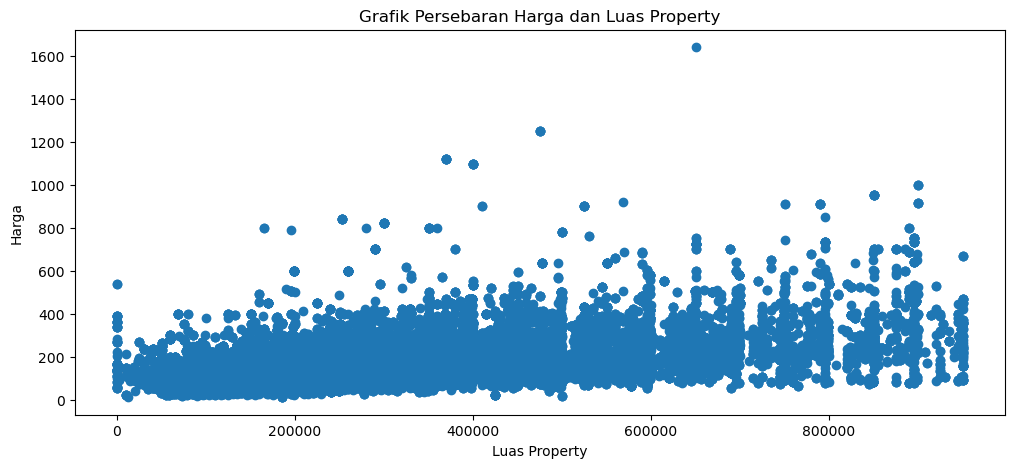

In [89]:
# copy dataset
df_vis1 = df_cleaned_res.copy()
df_vis1 = df_vis1.sort_values('house_area')

# re-arrange column
df_vis1['price'] = df_vis1['price'].replace('no price', 0)
df_vis1['price'] = df_vis1['price'].astype(float)

# visualization
fig = plt.figure(figsize = (12,5))
plt.scatter(df_vis1['price'], df_vis1['house_area'])

plt.xlabel('Luas Property')
plt.ylabel('Harga')
plt.title('Grafik Persebaran Harga dan Luas Property')
plt.show()

**Grafik Rata-Rata Harga Property Berdasarkan Kota**

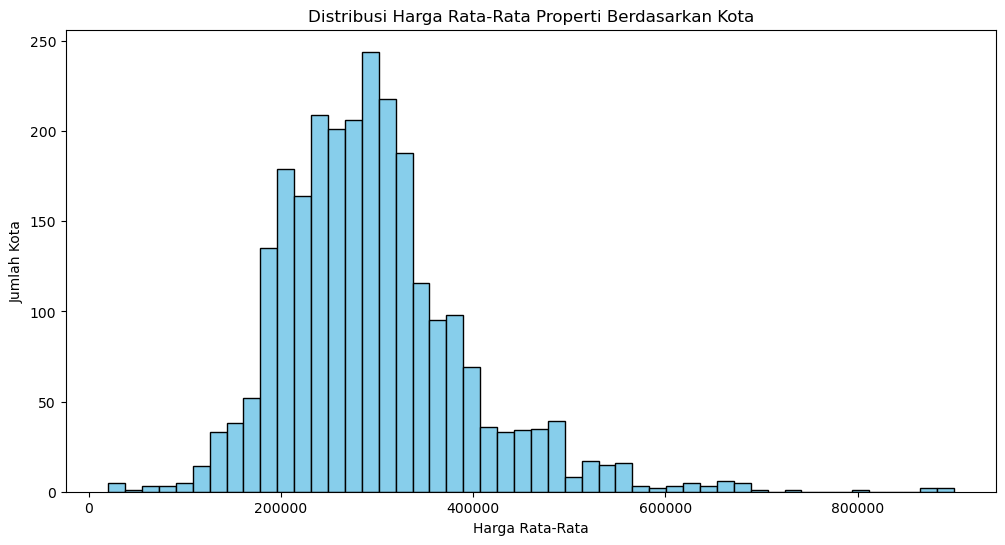

In [97]:
# copy dataset
df_vis2 = df_cleaned_res.copy()
df_vis2 = df_vis2[['city_name', 'price']]

# re-arrange column
df_vis2['price'] = df_vis2['price'].replace('no price', 0)
df_vis2['price'] = df_vis2['price'].astype(float)
new_df_vis2 = pd.DataFrame(df_vis2.groupby('city_name')['price'].mean()).reset_index()

# visualization
plt.figure(figsize=(12, 6))
plt.hist(new_df_vis2['price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Harga Rata-Rata')
plt.ylabel('Jumlah Kota')
plt.title('Distribusi Harga Rata-Rata Properti Berdasarkan Kota')
plt.show()

**Grafik Jumlah Subtype Property di Belgia**

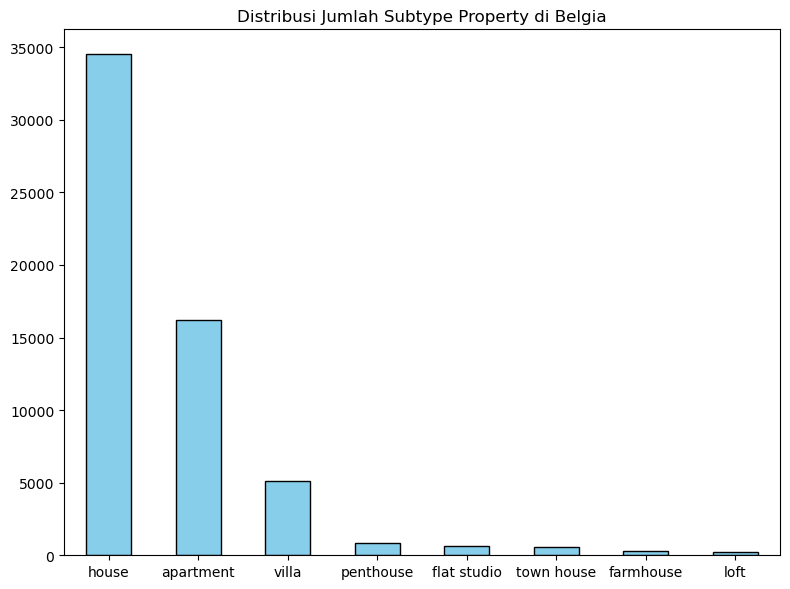

In [107]:
# copy dataset
df_vis3 = df_cleaned_res.copy()

# re-arrange column
subtype_counts = df_vis3['subtype_of_property'].value_counts()

# visualization
plt.figure(figsize=(8, 6))
subtype_counts.plot(kind='bar', color='skyblue', edgecolor='black', rot=0)
plt.title('Distribusi Jumlah Subtype Property di Belgia')
plt.tight_layout()
plt.show()

### Segmentasi (No 2)

In [112]:
# menambahkan kolom province dan region
province = []
region = []
for i in df_cleaned['postal_code']:
    if 1000 <= i <= 1299:
        province.append('Bruelles-Capitale')
        region.append('Bruxelles')
    elif 1300 <= i <= 1499:
        province.append('Brabant wallon')
        region.append('Wallonie')
    elif 1500 <= i <= 1999:
        province.append('Brabant flamand')
        region.append('Flandre')
    elif 2000 <= i <= 2999:
        province.append('Anvers')
        region.append('Flandre')
    elif 3000 <= i <= 3499:
        province.append('Brabant flamand')
        region.append('Flandre')
    elif 35500 <= i <= 3999:
        province.append('Limbourg')
        region.append('Flandre')
    elif 4000 <= i <= 4999:
        province.append('Liege')
        region.append('Wallonie')
    elif 5000 <= i <= 5999:
        province.append('Namur')
        region.append('Wallonie')
    elif 6000 <= i <= 6599:
        province.append('Hainaut')
        region.append('Wallonie')
    elif 6600 <= i <= 6999:
        province.append('Luxembourg')
        region.append('Wallonie')
    elif 7000 <= i <= 7999:
        province.append('Hainaut')
        region.append('Wallonie')
    elif 8000 <= i <= 8999:
        province.append('Flandre-Occidentale')
        region.append('Flandre')
    elif 9000 <= i <= 9999:
        province.append('Flandre-Orientale')
        region.append('Flandre')
    else:
        province.append('-')
        region.append('-')
        
df_cleaned['Province'] = province
df_cleaned['Region'] = region

# menampilkan 10 baris pertama
df_cleaned.head(10)

,postal_code,city_name,type_of_property,subtype_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,lattitude,longitude,Province,Region
0,1050,Ixelles,house,house,340000,6.0,203.0,1,0,1,0,95.0,2.0,0,to be done up,4.381571,50.822285,Bruelles-Capitale,Bruxelles
1,1050,Ixelles,house,house,599000,4.0,160.0,1,0,1,1,100.0,2.0,0,to be done up,4.381571,50.822285,Bruelles-Capitale,Bruxelles
2,1050,Ixelles,house,house,599000,3.0,160.0,1,0,1,1,130.0,2.0,0,good,4.381571,50.822285,Bruelles-Capitale,Bruxelles
3,1050,Ixelles,house,house,575000,3.0,171.0,0,0,0,0,46.0,2.0,0,just renovated,4.381571,50.822285,Bruelles-Capitale,Bruxelles
4,1050,Ixelles,house,house,590000,4.0,225.0,0,0,1,0,0.0,2.0,0,to renovate,4.381571,50.822285,Bruelles-Capitale,Bruxelles
5,1050,Ixelles,house,house,650000,6.0,250.0,1,0,0,0,60.0,2.0,0,good,4.381571,50.822285,Bruelles-Capitale,Bruxelles
6,1050,Ixelles,house,house,639000,6.0,215.0,1,0,1,0,58.0,2.0,0,good,4.381571,50.822285,Bruelles-Capitale,Bruxelles
7,1050,Ixelles,house,house,650000,2.0,145.0,0,0,1,1,134.0,2.0,0,as new,4.381571,50.822285,Bruelles-Capitale,Bruxelles
8,1050,Ixelles,house,house,650000,5.0,449.0,1,0,0,1,160.0,2.0,0,as new,4.381571,50.822285,Bruelles-Capitale,Bruxelles
9,1050,Ixelles,house,house,660000,4.0,283.0,1,0,1,0,92.0,2.0,0,to be done up,4.381571,50.822285,Bruelles-Capitale,Bruxelles


In [123]:
def initialize_centroids(data, k):
    # membuat bilangan random untuk menentukan jumlah centroids
    return data[np.random.choice(data.shape[0], k, replace=False)]

def assign_clusters(data, centroids):
    # menempatkan titik di sekitar centroids
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(data, labels, k):
    # menentukan centroids
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, iterations=100):
    # algoritma KMeans
    centroids = initialize_centroids(data, k)
    for _ in range(iterations):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# mendefinisikan data untuk segmentasi
df_cleaned_copy = df_cleaned[(df_cleaned['Province'] != '-') | (df_cleaned['Region'] != '-')]
data = df_cleaned_copy[['lattitude', 'longitude']].values

# One-hot encoding untuk kolom region
encoder_region = OneHotEncoder()
region_encoded = encoder_region.fit_transform(df_cleaned_copy[['Region']]).toarray()

# One-hot encoding untuk kolom provinsi
encoder_provinsi = OneHotEncoder()
provinsi_encoded = encoder_provinsi.fit_transform(df_cleaned_copy[['Province']]).toarray()

# Gabungkan hasil encoding region dan provinsi
encoded_data = np.concatenate((region_encoded, provinsi_encoded), axis=1)

# Kombinasikan hasil encoding dengan data yang telah di-cluster
data_with_encoding = np.hstack((data, encoded_data))

# menjalankan segmentasi
k = 2
labels, centroids = kmeans(data_with_encoding, k)
print("Labels:", labels)
print("Centroids:", centroids)

Labels: [0 0 0 ... 0 1 0]
Centroids: [[4.65383059e+00 5.07309902e+01 1.43258012e-01 3.39462413e-01
  5.17279575e-01 2.06394920e-01 1.33067494e-01 7.34751145e-02
  1.43258012e-01 0.00000000e+00 0.00000000e+00 1.74937232e-01
  1.60906808e-01 4.65957761e-02 6.13646433e-02]
 [3.37677625e+00 5.10698279e+01 0.00000000e+00 9.98439667e-01
  1.56033287e-03 0.00000000e+00 5.02773925e-03 0.00000000e+00
  0.00000000e+00 6.09743412e-01 3.83668516e-01 1.56033287e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]


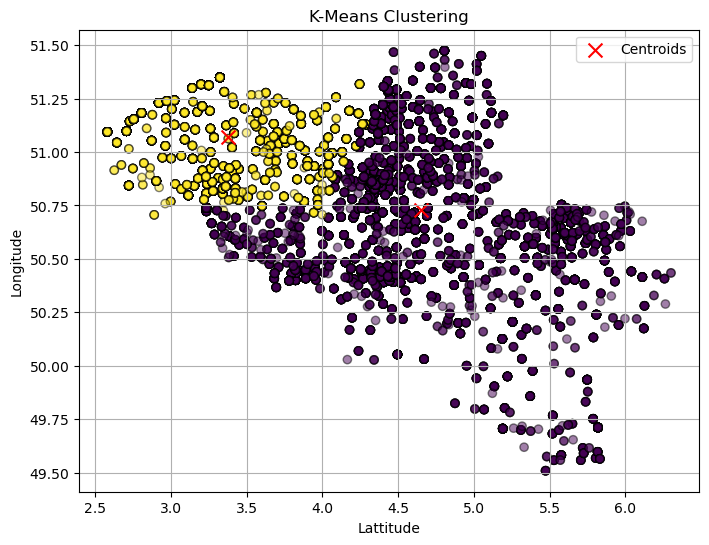

In [124]:
# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Lattitude')
plt.ylabel('Longitude')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

**Interpretasi**

Berdasarkan pembagian wilayah administratif atas kolom province dan region, dengan menggunakan segmentasi KMeans yang melibatkan kolom Lattitude dan Longitude, diperoleh 2 segmen provinsi yang berbeda, yaitu segmen 1 (kuning) dan segmen 2 (ungu).

Kedua segmen dibedakan dari letak koordinat Lattitude dan Longitude yang telah ditentukan. Dalam hal ini, segmen 1 memiliki koordinat dalam rentang Lattitude 2,5 - 4,4 dan Longitude 50,60 - 51,30, sedangkan segmen 2 memiliki koordinat di luar rentang tersebut.

### Soal Tambahan

In [126]:
def initialize_centroids(data, k):
    # membuat bilangan random untuk menentukan jumlah centroids
    return data[np.random.choice(data.shape[0], k, replace=False)]

def assign_clusters(data, centroids):
    # menempatkan titik di sekitar centroids
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(data, labels, k):
    # menentukan centroids
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, iterations=100):
    # algoritma KMeans
    centroids = initialize_centroids(data, k)
    for _ in range(iterations):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# mendefinisikan data untuk segmentasi
df_cleaned_copy = df_cleaned[(df_cleaned['Province'] != '-') | (df_cleaned['Region'] != '-')]
data = df_cleaned_copy[['price', 'lattitude', 'longitude']].values

# One-hot encoding untuk kolom region
encoder_region = OneHotEncoder()
region_encoded = encoder_region.fit_transform(df_cleaned_copy[['Region']]).toarray()

# One-hot encoding untuk kolom provinsi
encoder_provinsi = OneHotEncoder()
provinsi_encoded = encoder_provinsi.fit_transform(df_cleaned_copy[['Province']]).toarray()

# Gabungkan hasil encoding region dan provinsi
encoded_data = np.concatenate((region_encoded, provinsi_encoded), axis=1)

# Kombinasikan hasil encoding dengan data yang telah di-cluster
data_with_encoding = np.hstack((data, encoded_data))

# menjalankan segmentasi
k = 4
labels, centroids = kmeans(data_with_encoding, k)
print("Labels:", labels)
print("Centroids:", centroids)

Labels: [3 0 0 ... 1 1 1]
Centroids: [[7.23667187e+05 4.20389409e+00 5.09232513e+01 2.26658837e-01
  5.67234292e-01 2.06106870e-01 1.33294187e-01 1.45038168e-01
  1.10980622e-01 2.26658837e-01 1.90839695e-01 9.80622431e-02
  3.52319436e-02 2.87727540e-02 1.82031709e-02 1.29183793e-02]
 [4.44845283e+05 4.25307728e+00 5.09034673e+01 1.39644351e-01
  6.17677824e-01 2.42677824e-01 1.67625523e-01 1.61349372e-01
  8.83891213e-02 1.39644351e-01 1.66056485e-01 1.22646444e-01
  4.36715481e-02 5.64853556e-02 2.40585774e-02 3.00732218e-02]
 [1.54269201e+05 4.32906451e+00 5.07187106e+01 5.74842564e-02
  3.83174552e-01 5.59341192e-01 9.70450509e-02 3.58469239e-02
  1.84078799e-02 5.74842564e-02 1.76489585e-01 7.37929921e-02
  2.53673502e-01 1.88115614e-01 4.42435007e-02 5.49006943e-02]
 [2.82083789e+05 4.25118889e+00 5.08684724e+01 8.74835310e-02
  6.13306983e-01 2.99209486e-01 1.74703557e-01 9.81554677e-02
  4.66403162e-02 8.74835310e-02 1.92885375e-01 1.47562582e-01
  7.64163373e-02 9.86824769e-0

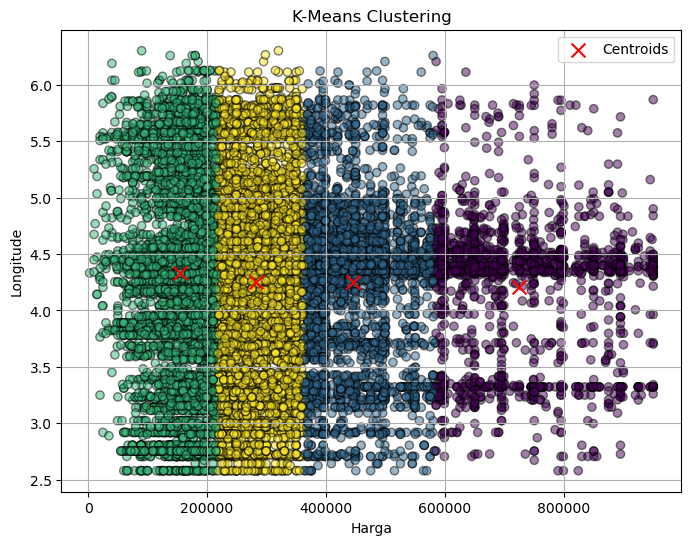

In [131]:
# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Harga')
plt.ylabel('Longitude')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

**Interpretasi**

Berdasarkan pembagian wilayah administratif atas kolom province dan region, dengan menggunakan segmentasi KMeans yang melibatkan kolom Price (harga), Lattitude, dan Longitude, diperoleh 4 segmen harga yang berbeda, yaitu segmen 1 (0-200,000), segmen 2 (200.000 - 400.000), segmen 3 (400.000 - 600.000), dan segmen 4 (600.000 - 800.000).

Segmen 1 menjadi segmen dengan jumlah data terbanyak, dan persebaran longitude terpadat, yang kemudian diikuti seterusnya oleh segmen 2, 3, dan 4. Dalam hal ini, segmen 4 menjadi segmen harga dengan jumlah data paling sedikit.